In [1]:
import numpy as np

In [2]:
class PCA:
    def __init__(self,n_components=2):
        self.n_components = n_components
        
    def fit(self,X):
        mean = X.mean(axis=0)
        X = X - mean
        
        cov = np.cov(X.T)
        
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        
        eigenvectors = eigenvectors.T
        
        idxs = np.argsort(eigenvalues)[::-1]
        
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.components = eigenvectors[:self.n_components]
        
    def transform(self,X):
        X = X - X.mean(axis=0)
        
        return np.dot(X,self.components.T)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

In [5]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [6]:
print("X-shape",X.shape)
print("shape of transformed X:",X_projected.shape)

X-shape (150, 4)
shape of transformed X: (150, 2)


In [7]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]

Text(0, 0.5, 'PC2')

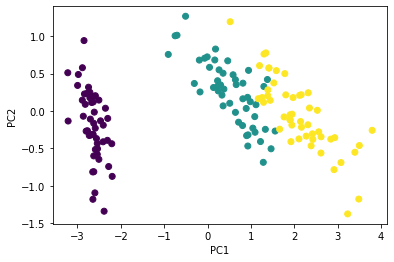

In [8]:
plt.scatter(x1,x2,c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")